Here you can find a lot of test with different optimization method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from pulser import Pulse, Sequence, Register
from pulser_simulation import QutipEmulator
from pulser.devices import DigitalAnalogDevice
from pulser.waveforms import InterpolatedWaveform
from scipy.optimize import minimize
from scipy.spatial.distance import pdist, squareform

In [2]:
import qubogen
import numpy as np

In [3]:
def callback_graph(xk):
    clear_output(wait=True)
    obj_func_eval = func(xk, Q)  
    objective_func_vals.append(obj_func_eval)
    plt.figure(figsize=(20, 5))
    #plt.title("Coût selon le nombre d'itération")
    plt.xlabel("Itération")
    plt.ylabel("Coût")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()


In [4]:
import time

# Génération QUBO

In [5]:
s = np.array([3,3,1,1,1,2,1,30,3])

In [6]:
s = np.array([3,7,1,2,1,3,2,4,1,4,1,7,2,1,50,3])

In [7]:
s = np.array([1,3,2,1])

In [8]:
s = np.array([1,3])

In [9]:
Q = qubogen.qubo_number_partition(s)

In [10]:
Q

array([[-3,  3],
       [ 3, -3]])

In [11]:
Q = np.array([[-24.30855294,   2.38576131,   2.60924427,   3.17048932,   3.66185548,
    3.49584018,   1.97057452,   2.01842043,   2.56804874,   2.42831869],
 [  2.38576131, -17.00838133,   1.74037997,   2.11473344,   2.44247732,
    2.33174422,   1.31438381,   1.34629729,   1.71290233,   1.61970164],
 [  2.60924427,   1.74037997, -18.43859064,   2.31282823,   2.67127307,
    2.55016719,   1.43750693,   1.47240986,   1.87335614,   1.77142499],
 [  3.17048932,   2.11473344,   2.31282823, -21.90722118,   3.24586043,
    3.09870484,   1.74671281,   1.78912331,   2.27631261,   2.1524562 ],
 [  3.66185548,   2.44247732,   2.67127307,   3.24586043, -24.79938081,
    3.57894576,   2.01742041,   2.06640374,   2.62909821,   2.4860464 ],
 [  3.49584018,   2.33174422,   2.55016719,   3.09870484,   3.57894576,
  -23.83732292,   1.92595786,   1.97272046,   2.50990439,   2.37333803],
 [  1.97057452,   1.31438381,   1.43750693,   1.74671281,   2.01742041,
    1.92595786, -14.27720264,   1.11200526,   1.41481115,   1.33782988],
 [  2.01842043,   1.34629729,   1.47240986,   1.78912331,   2.06640374,
    1.97272046,   1.11200526, -14.59685599,   1.44916301,   1.37031263],
 [  2.56804874,   1.71290233,   1.87335614,   2.27631261,   2.62909821,
    2.50990439,   1.41481115,   1.44916301, -18.17705379,   1.7434572 ],
 [  2.42831869,   1.61970164,   1.77142499,   2.1524562 ,   2.4860464 ,
    2.37333803,   1.33782988,   1.37031263,   1.7434572 , -17.28288566]])

In [14]:
Q = np.array([[ -5,   2,   4,   0],
       [  2, -3,   1,   0],
       [  4,   1, -8,   5],
       [  0,   0,  5,  -6]])

## Résolution classique du problème

In [15]:
bitstrings = [np.binary_repr(i, len(Q)) for i in range(2 ** len(Q))]
costs = []
# this takes exponential time with the dimension of the QUBO
for b in bitstrings:
    z = np.array(list(b), dtype=int)
    cost = z.T @ Q @ z
    costs.append(cost)
zipped = zip(bitstrings, costs)
sort_zipped = sorted(zipped, key=lambda x: x[1])
indexes = sort_zipped[:10000]
print(indexes)

[('1001', -11), ('1101', -10), ('0101', -9), ('0110', -9), ('0010', -8), ('0001', -6), ('0111', -5), ('1000', -5), ('1010', -5), ('0011', -4), ('1100', -4), ('0100', -3), ('1110', -2), ('1011', -1), ('0000', 0), ('1111', 2)]


In [16]:
indexes = [item[0] for item in indexes if '0' in item[0] and '1' in item[0]]
print(indexes)

['1001', '1101', '0101', '0110', '0010', '0001', '0111', '1000', '1010', '0011', '1100', '0100', '1110', '1011']


## de manière quantique

In [17]:
def evaluate_mapping(new_coords, *args):
    """Cost function to minimize. Ideally, the pairwise
    distances are conserved"""
    Q, shape = args
    new_coords = np.reshape(new_coords, shape)
    new_Q = squareform(
        DigitalAnalogDevice.interaction_coeff / pdist(new_coords) ** 6
    )
    return np.linalg.norm(new_Q - Q)

In [18]:
shape = (len(Q), 2)
costs = []
np.random.seed()
x0 = np.random.random(shape).flatten()
res = minimize(
    evaluate_mapping,
    x0,
    args=(Q, shape),
    method="Nelder-Mead",
    tol=1e-6,
    options={"maxiter": 200000, "maxfev": None},
)
coords = np.reshape(res.x, (len(Q), 2))

In [19]:
res.x

array([ 1.13669106,  7.98074757, -7.66961632,  0.11539103,  5.47609067,
       -1.6022997 , 12.22457277, -9.1646525 ])

In [20]:
coords

array([[ 1.13669106,  7.98074757],
       [-7.66961632,  0.11539103],
       [ 5.47609067, -1.6022997 ],
       [12.22457277, -9.1646525 ]])

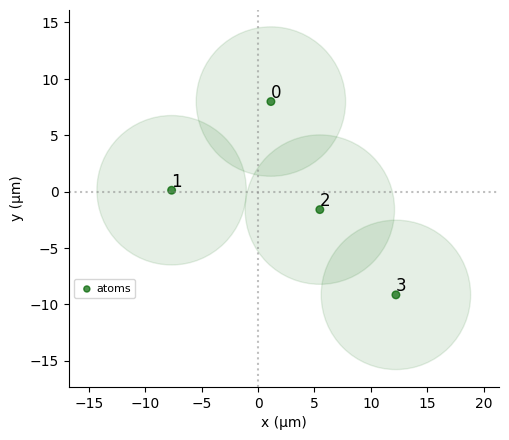

In [21]:
qubits = dict(enumerate(coords))
reg = Register(qubits)
reg.draw(
    blockade_radius=DigitalAnalogDevice.rydberg_blockade_radius(1.0),
    draw_graph=False,
    draw_half_radius=True,
)

In [22]:
LAYERS = 2

# Parametrized sequence
seq = Sequence(reg, DigitalAnalogDevice)
seq.declare_channel("ch0", "rydberg_global")

t_list = seq.declare_variable("t_list", size=LAYERS)
s_list = seq.declare_variable("s_list", size=LAYERS)

for t, s in zip(t_list, s_list):
    pulse_1 = Pulse.ConstantPulse(1000 * t, 1.0, 0.0, 0)
    pulse_2 = Pulse.ConstantPulse(1000 * s, 0.0, 1.0, 0)

    seq.add(pulse_1, "ch0")
    seq.add(pulse_2, "ch0")

seq.measure("ground-rydberg")

In [23]:
LAYERS = 2

# Parametrized sequence
seq = Sequence(reg, DigitalAnalogDevice)
seq.declare_channel("ch0", "rydberg_global")

t_list = seq.declare_variable("t_list", size=LAYERS)
s_list = seq.declare_variable("s_list", size=LAYERS)

for t, s in zip(t_list, s_list):
    pulse_1 = Pulse.ConstantPulse(1000 * t, 1.0, 0.0, 0)
    pulse_2 = Pulse.ConstantPulse(1000 * s, 0.0, 1.0, 0)

    seq.add(pulse_1, "ch0")
    seq.add(pulse_2, "ch0")

seq.measure("ground-rydberg")

In [24]:
def quantum_loop(parameters):
    params = np.array(parameters)
    t_params, s_params = np.reshape(params.astype(int), (2, LAYERS))
    assigned_seq = seq.build(t_list=t_params, s_list=s_params)
    simul = QutipEmulator.from_sequence(assigned_seq, sampling_rate=0.01)
    results = simul.run()
    count_dict = results.sample_final_state()  # sample from the state vector
    return count_dict

In [25]:
np.random.seed()  # ensures reproducibility of the tutorial
guess = {
    "t": np.random.uniform(8, 10, LAYERS),
    "s": np.random.uniform(1, 3, LAYERS),
}

In [26]:
example_dict = quantum_loop(np.r_[guess["t"], guess["s"]])

In [27]:
def plot_distribution(C):
    C = dict(sorted(C.items(), key=lambda item: item[1], reverse=True))
    color_dict = {key: "r" if key in indexes else "g" for key in C}
    plt.figure(figsize=(24, 12))
    plt.xlabel("bitstrings")
    plt.ylabel("counts")
    plt.bar(C.keys(), C.values(), width=0.5, color=color_dict.values())
    plt.xticks(rotation="vertical")
    plt.show()

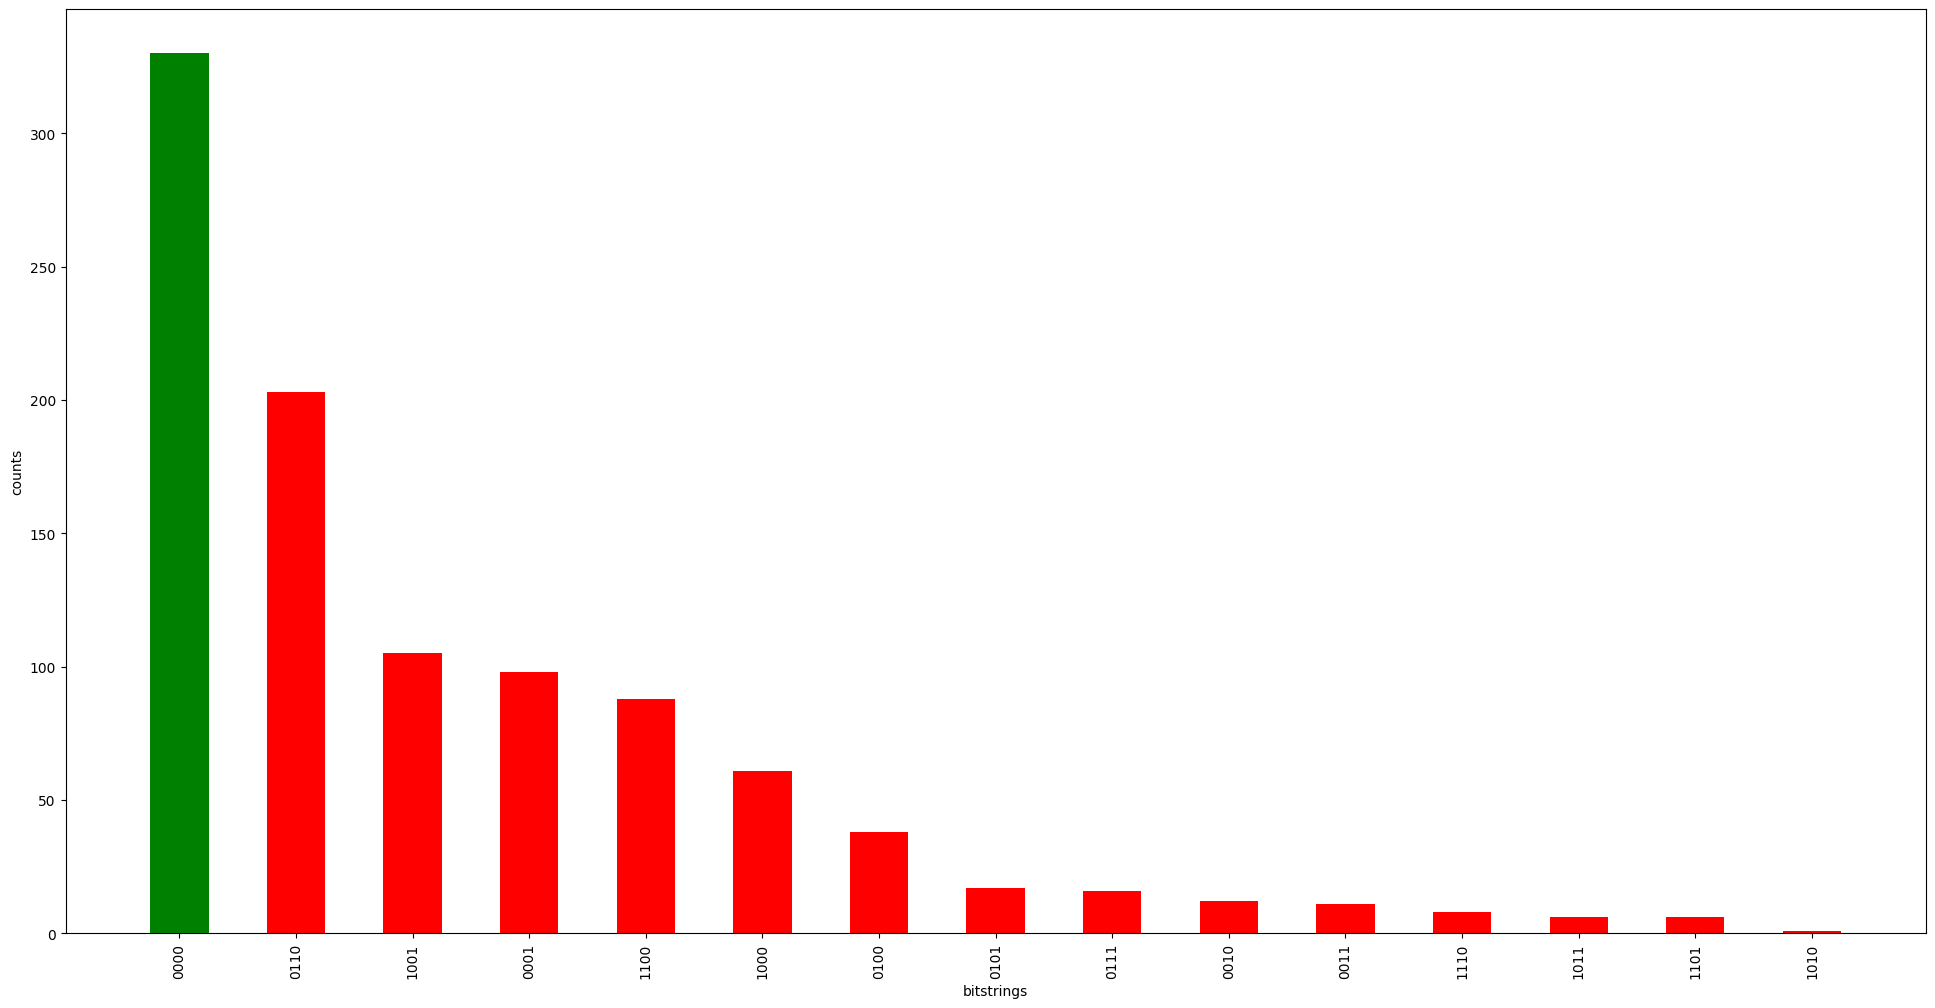

In [28]:
plot_distribution(example_dict)

In [29]:
def get_cost_colouring(bitstring, Q):
    z = np.array(list(bitstring), dtype=int)
    cost = z.T @ Q @ z
    return cost


def get_cost(counter, Q):
    cost = sum(counter[key] * get_cost_colouring(key, Q) for key in counter)
    return cost / sum(counter.values())  # Divide by total samples

In [30]:
def func(param, *args):
    Q = args[0]
    C = quantum_loop(param)
    cost = get_cost(C, Q)
    return cost

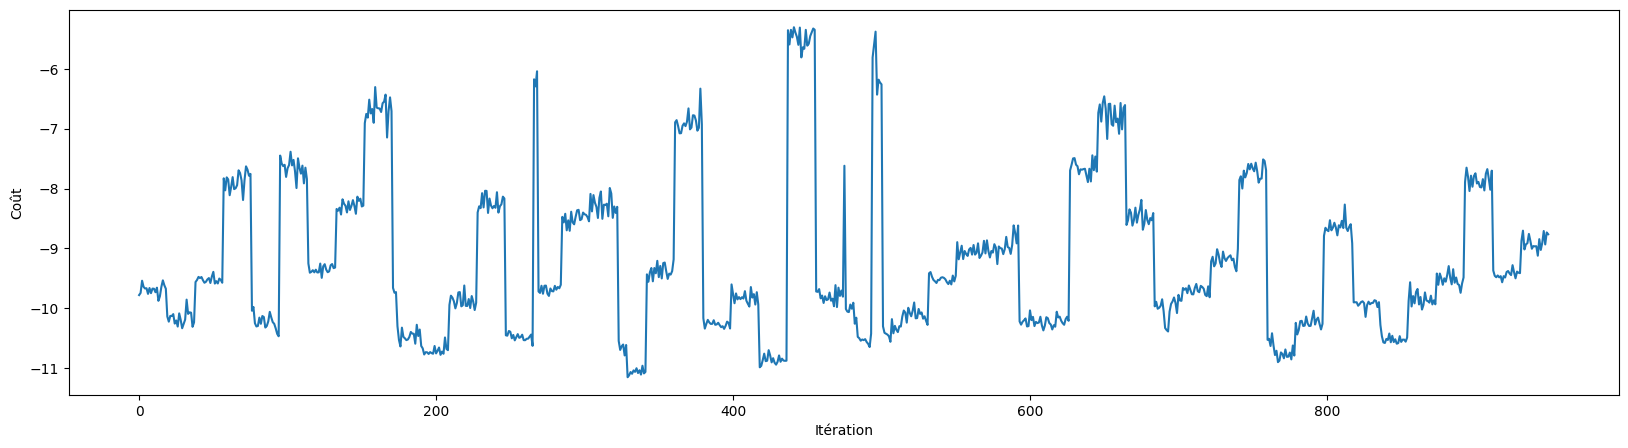

In [29]:
scores = []
params = []
objective_func_vals = []
for repetition in range(50):
    guess = {
        "t": np.random.uniform(1, 10, LAYERS),
        "s": np.random.uniform(1, 10, LAYERS),
    }

    try:
        res = minimize(
            func,
            args=Q,
            x0=np.r_[guess["t"], guess["s"]],
            method="Nelder-Mead", #SPSA
            tol=1e-5,
            options={"maxiter": 20},
            callback=callback_graph,
        )
        scores.append(res.fun)
        params.append(res.x)
    except Exception as e:
        pass

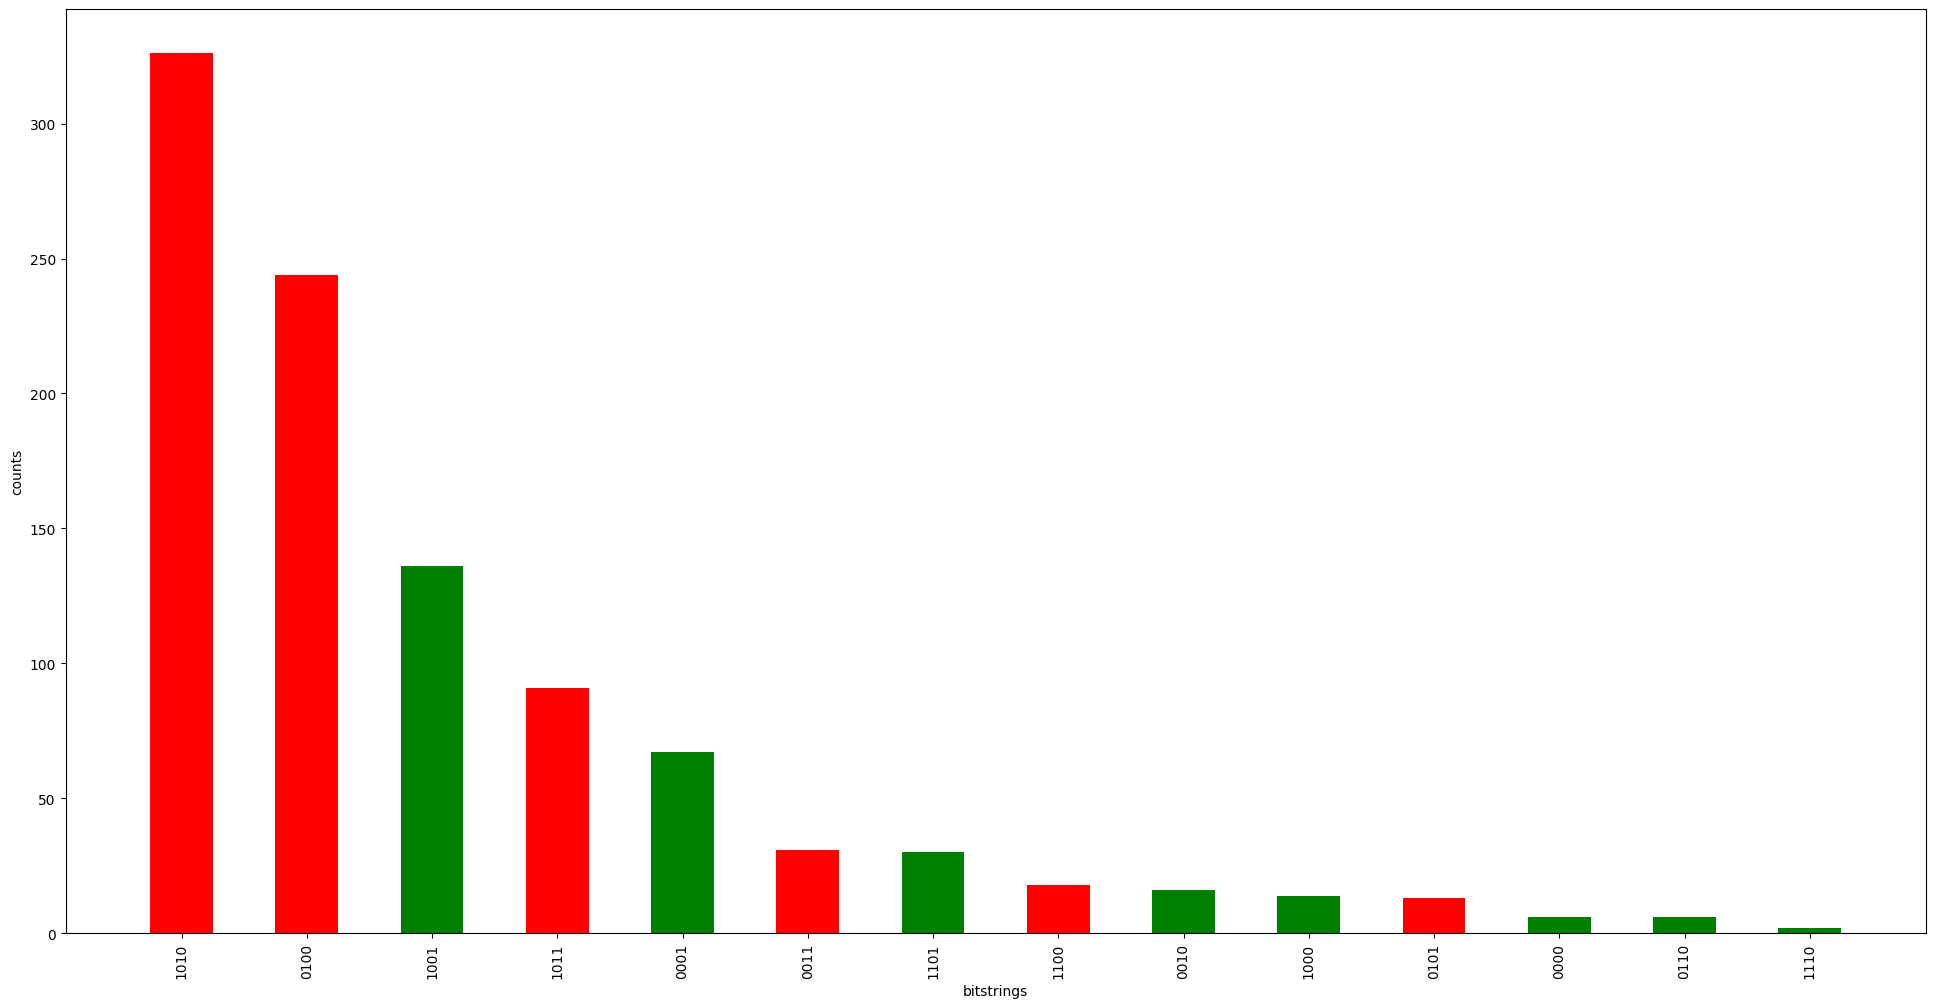

In [30]:
optimal_count_dict = quantum_loop(params[np.argmin(scores)])
plot_distribution(optimal_count_dict)

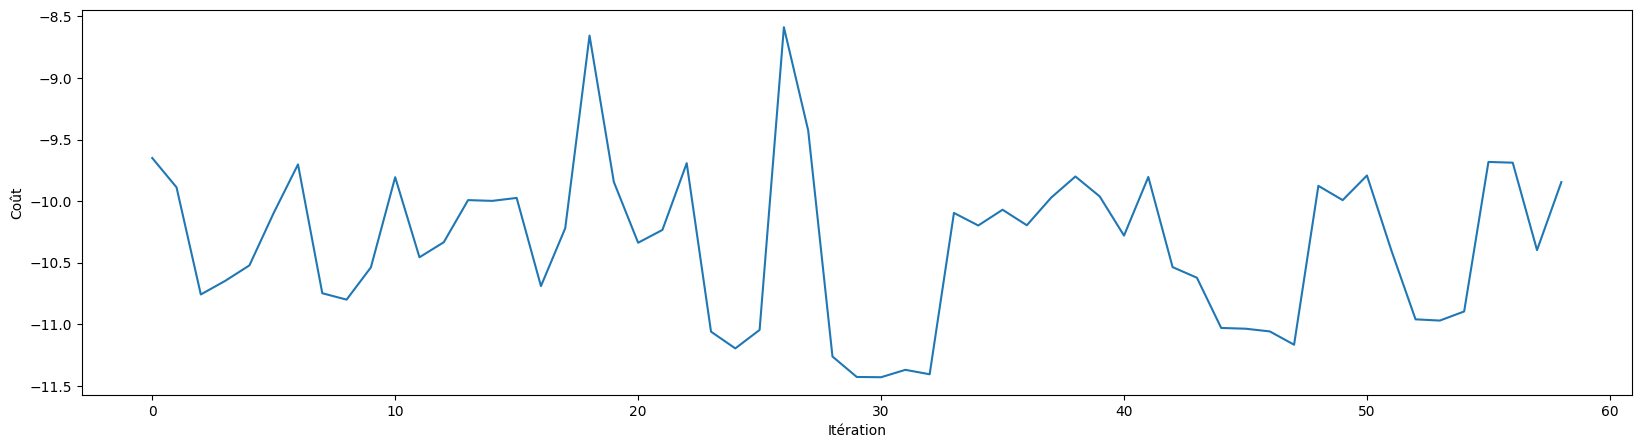

In [32]:
scores = []
params = []
objective_func_vals = []
for repetition in range(50):
    guess = {
        "t": np.random.uniform(1, 10, LAYERS),
        "s": np.random.uniform(1, 10, LAYERS),
    }

    try:
        res = minimize(
            func,
            args=Q,
            x0=np.r_[guess["t"], guess["s"]],
            method="Powell",
            tol=1e-5,
            options={"maxiter": 20},
            callback=callback_graph,
        )
        scores.append(res.fun)
        params.append(res.x)
        
    except Exception as e:
        pass

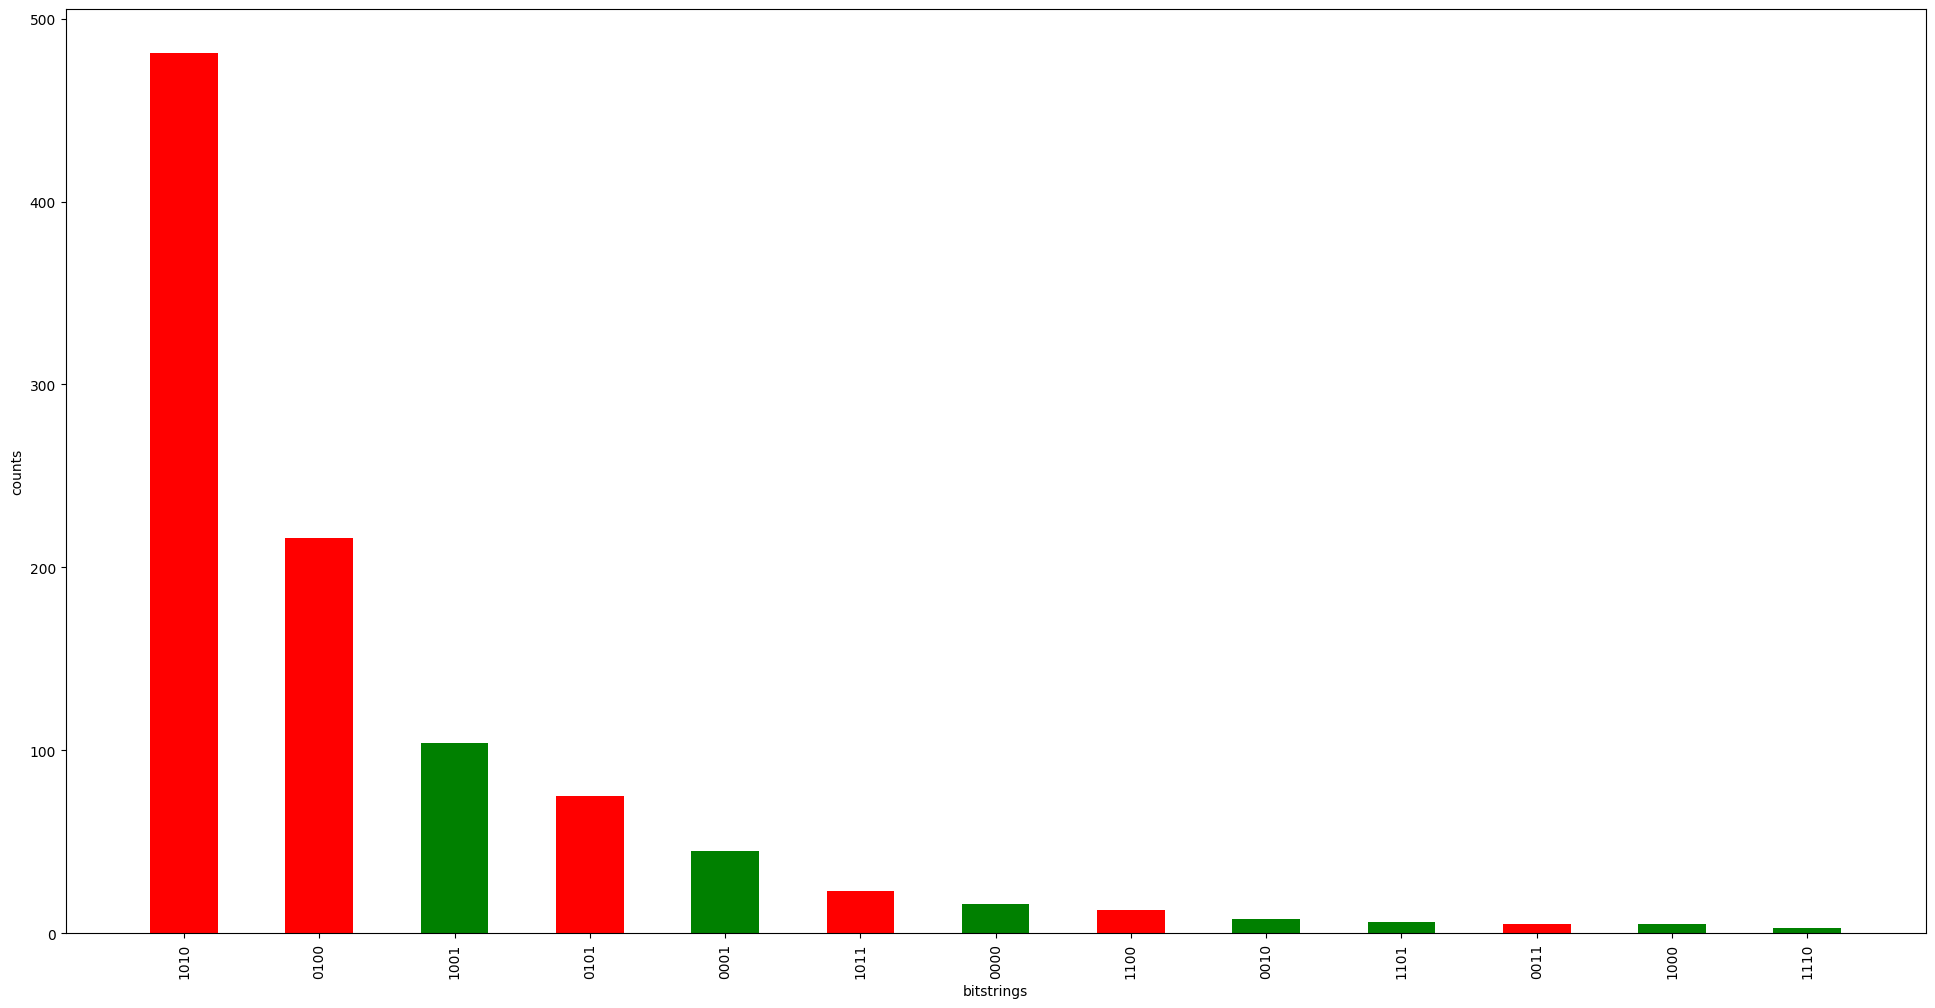

In [33]:
optimal_count_dict = quantum_loop(params[np.argmin(scores)])
plot_distribution(optimal_count_dict)

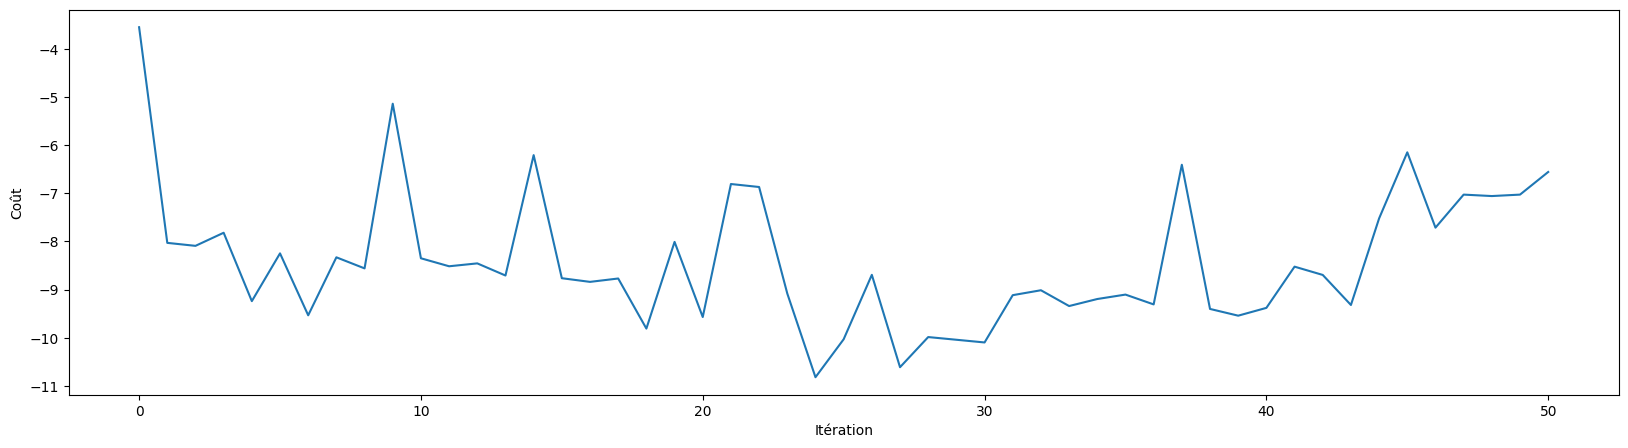

In [34]:
scores = []
params = []
objective_func_vals = []
for repetition in range(50):
    guess = {
        "t": np.random.uniform(1, 10, LAYERS),
        "s": np.random.uniform(1, 10, LAYERS),
    }

    try:
        res = minimize(
            func,
            args=Q,
            x0=np.r_[guess["t"], guess["s"]],
            method="CG", #SPSA
            tol=1e-5,
            options={"maxiter": 20},
            callback=callback_graph,
        )
        scores.append(res.fun)
        params.append(res.x)

        if res.fun <= -12:
            print("Stopping early as cost function value reached -12")
            break
        
    except Exception as e:
        pass

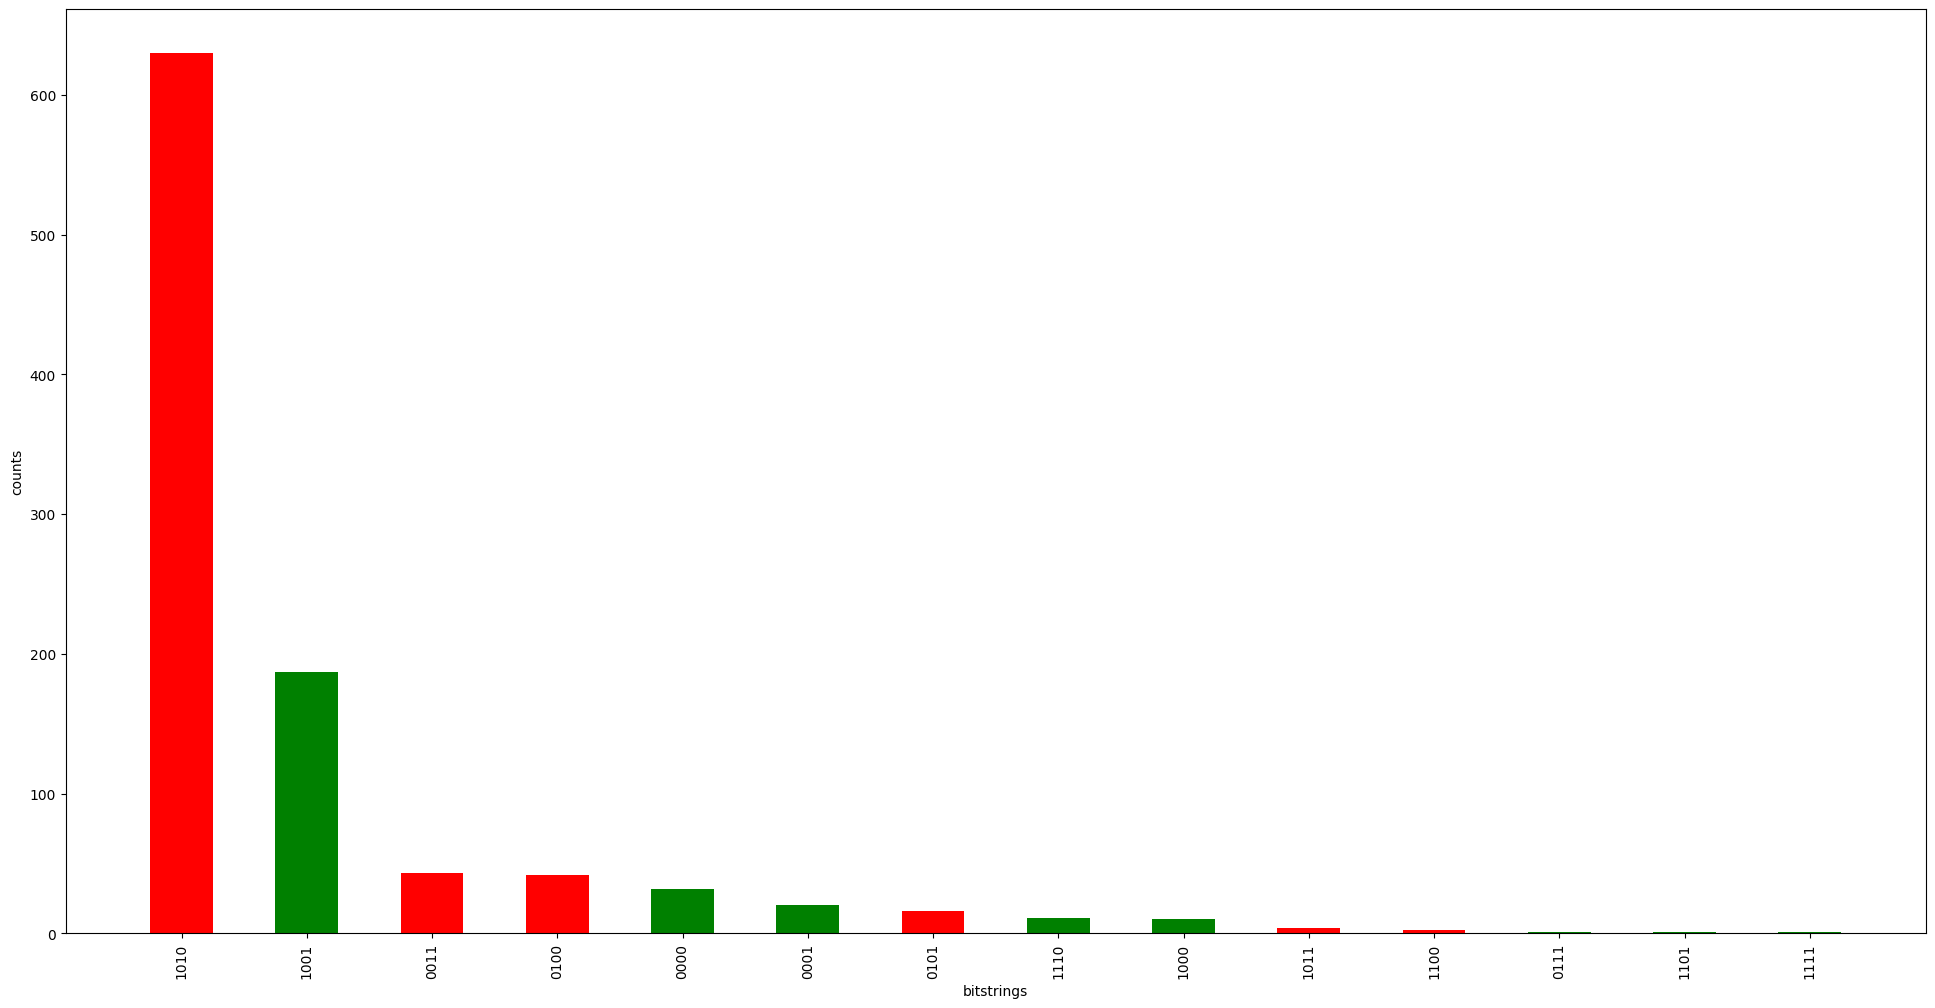

In [35]:
optimal_count_dict = quantum_loop(params[np.argmin(scores)])
plot_distribution(optimal_count_dict)

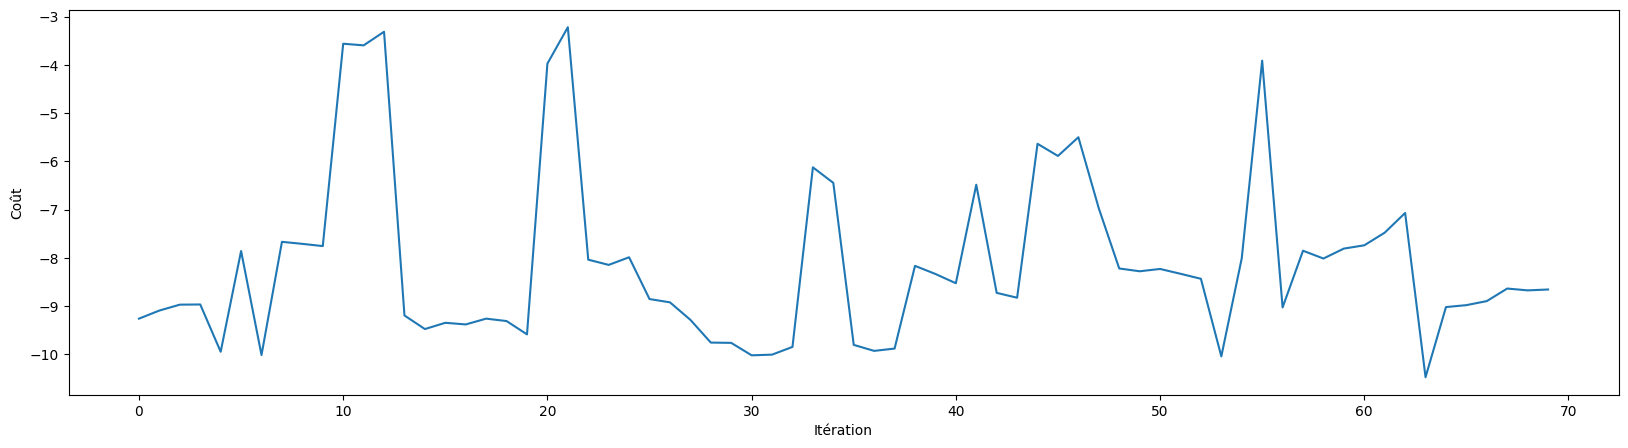

In [36]:
scores = []
params = []
objective_func_vals = []
for repetition in range(50):
    guess = {
        "t": np.random.uniform(1, 10, LAYERS),
        "s": np.random.uniform(1, 10, LAYERS),
    }

    try:
        res = minimize(
            func,
            args=Q,
            x0=np.r_[guess["t"], guess["s"]],
            method="BFGS", #SPSA
            tol=1e-5,
            options={"maxiter": 20},
            callback=callback_graph,
        )
        scores.append(res.fun)
        params.append(res.x)

        if res.fun <= -12:
            print("Stopping early as cost function value reached -12")
            break
        
    except Exception as e:
        pass

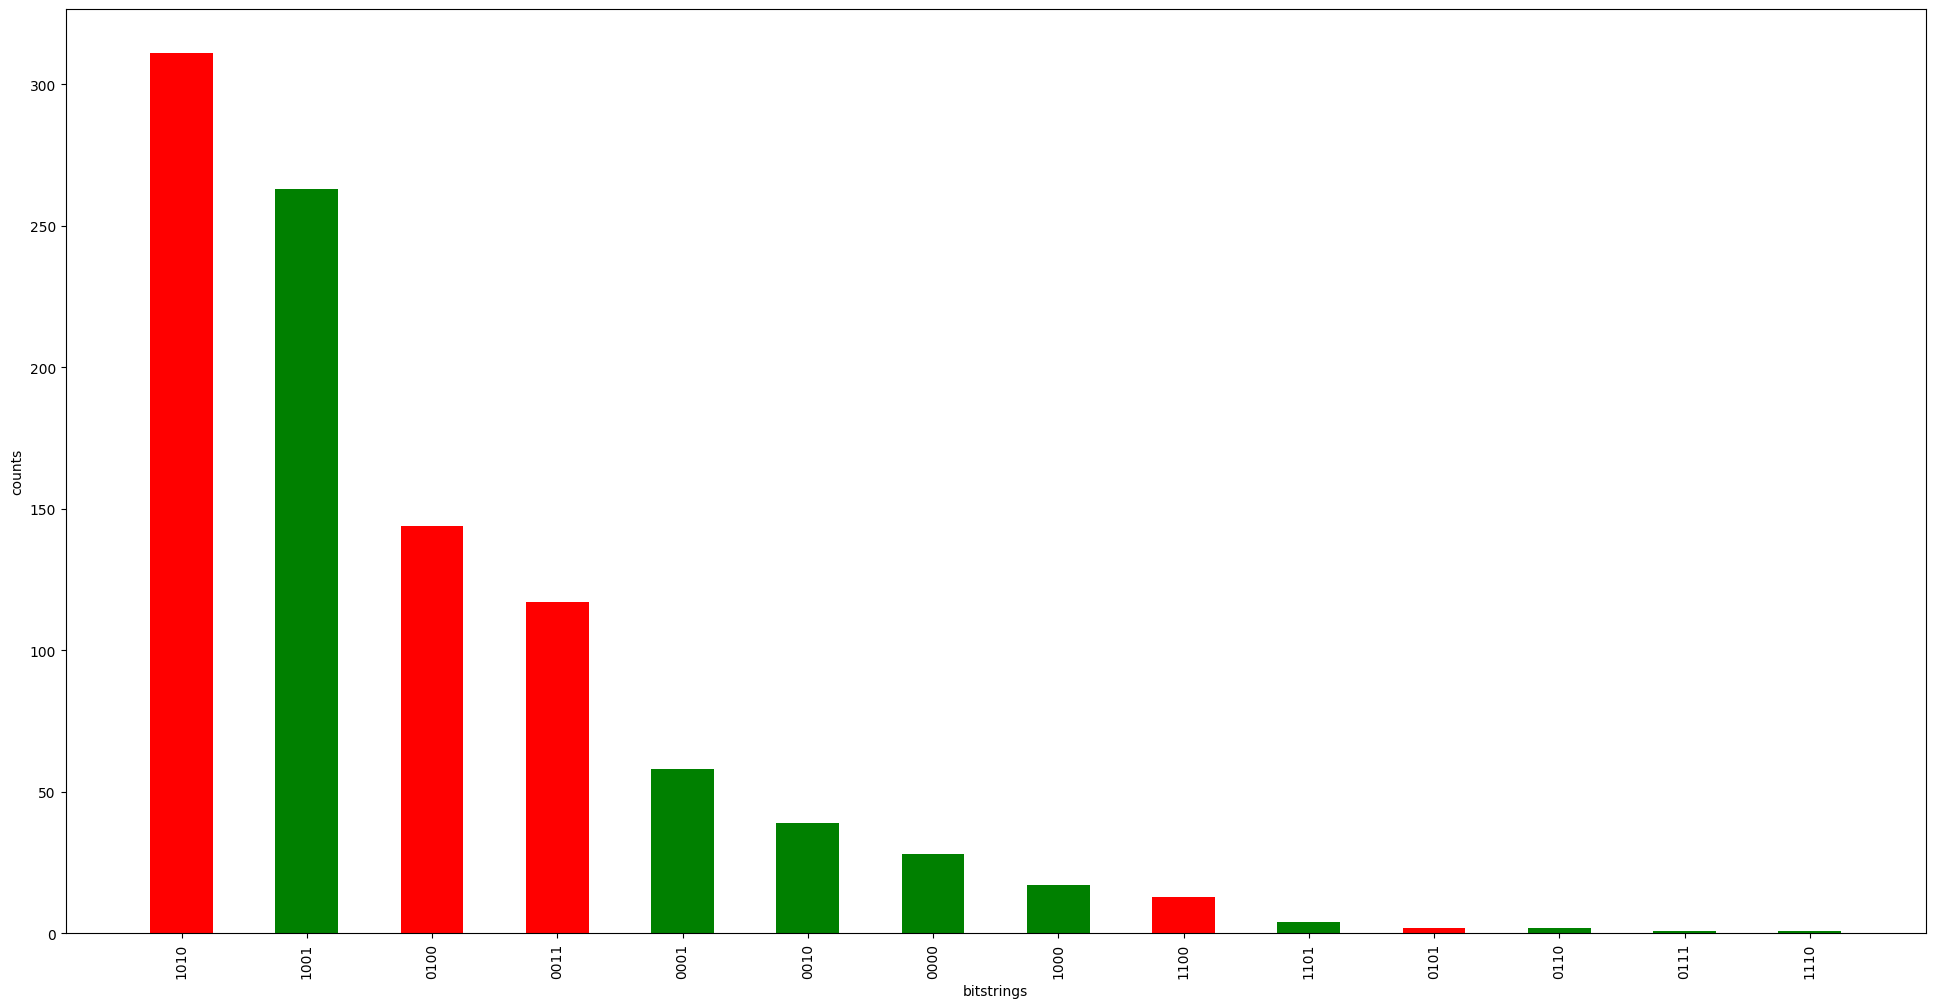

In [37]:
optimal_count_dict = quantum_loop(params[np.argmin(scores)])
plot_distribution(optimal_count_dict)

In [126]:
scores = []
params = []
objective_func_vals = []
for repetition in range(50):
    guess = {
        "t": np.random.uniform(1, 10, LAYERS),
        "s": np.random.uniform(1, 10, LAYERS),
    }

    try:
        res = minimize(
            func,
            args=Q,
            x0=np.r_[guess["t"], guess["s"]],
            method="Newton-CG", #SPSA
            tol=1e-5,
            options={"maxiter": 20},
            callback=callback_graph,
        )
        scores.append(res.fun)
        params.append(res.x)
    except Exception as e:
        pass

: 

In [ ]:
optimal_count_dict = quantum_loop(params[np.argmin(scores)])
plot_distribution(optimal_count_dict)

In [127]:
scores = []
params = []
objective_func_vals = []
for repetition in range(50):
    guess = {
        "t": np.random.uniform(1, 10, LAYERS),
        "s": np.random.uniform(1, 10, LAYERS),
    }

    try:
        res = minimize(
            func,
            args=Q,
            x0=np.r_[guess["t"], guess["s"]],
            method="COBYLA", #SPSA
            tol=1e-5,
            options={"maxiter": 20},
            callback=callback_graph,
        )
        scores.append(res.fun)
        params.append(res.x)
    except Exception as e:
        pass

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_cobyla_py.py", line 290, in wrapped_callback
capi_return is NULL
Call-back cb_callback_in__cobyla__user__routines failed.
Fatal Python error: F2PySwapThreadLocalCallbackPtr: F2PySwapThreadLocalCallbackPtr: PyLong_AsVoidPtr failed
Python runtime state: initialized
    callback(np.copy(x))
  File "/var/folders/8f/f9lf8rq10rj81rd_ljyfrdbm0000gq/T/ipykernel_7646/1250054052.py", line 3, in callback_graph
  File "/var/folders/8f/f9lf8rq10rj81rd_ljyfrdbm0000gq/T/ipykernel_7646/3096209052.py", line 3, in func
  File "/var/folders/8f/f9lf8rq10rj81rd_ljyfrdbm0000gq/T/ipykernel_7646/1029010566.py", line 4, in quantum_loop
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pulser/sequence/sequence.py", line 1637, in build
    args_ = [
            ^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/si

In [ ]:
optimal_count_dict = quantum_loop(params[np.argmin(scores)])
plot_distribution(optimal_count_dict)

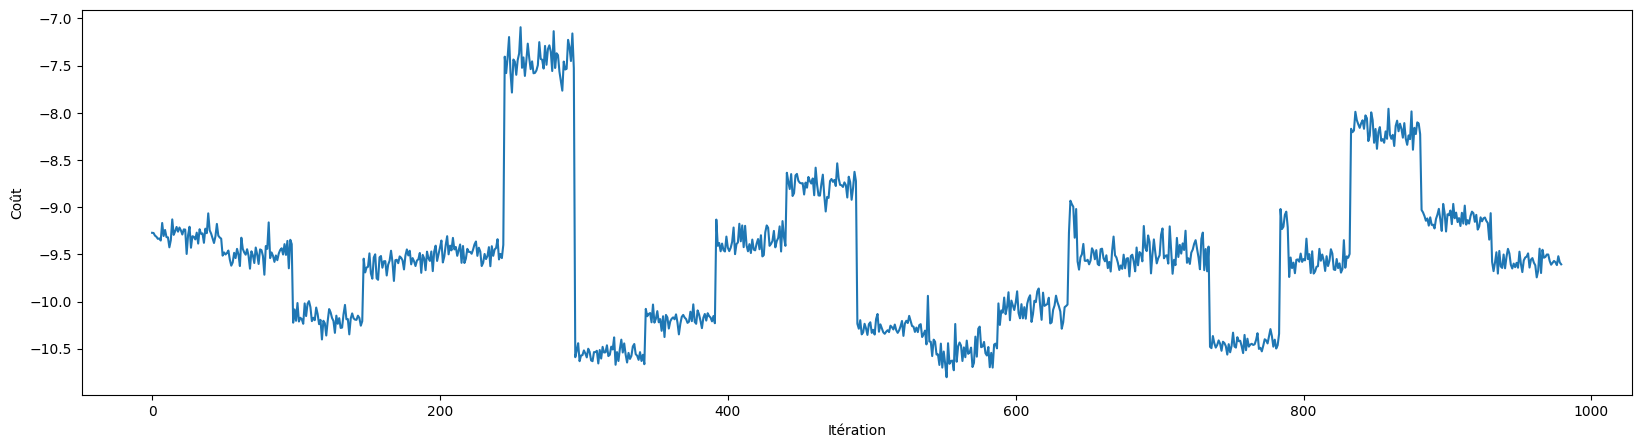

In [38]:
scores = []
params = []
objective_func_vals = []
for repetition in range(20):
    guess = {
        "t": np.random.uniform(1, 10, LAYERS),
        "s": np.random.uniform(1, 10, LAYERS),
    }

    try:
        res = minimize(
            func,
            args=Q,
            x0=np.r_[guess["t"], guess["s"]],
            method="Nelder-Mead",
            tol=1e-5,
            options={"maxiter": 50},
            callback=callback_graph,
        )
        scores.append(res.fun)
        params.append(res.x)

        if res.fun <= -12:
            print("Stopping early as cost function value reached -12")
            break
        
    except Exception as e:
        pass

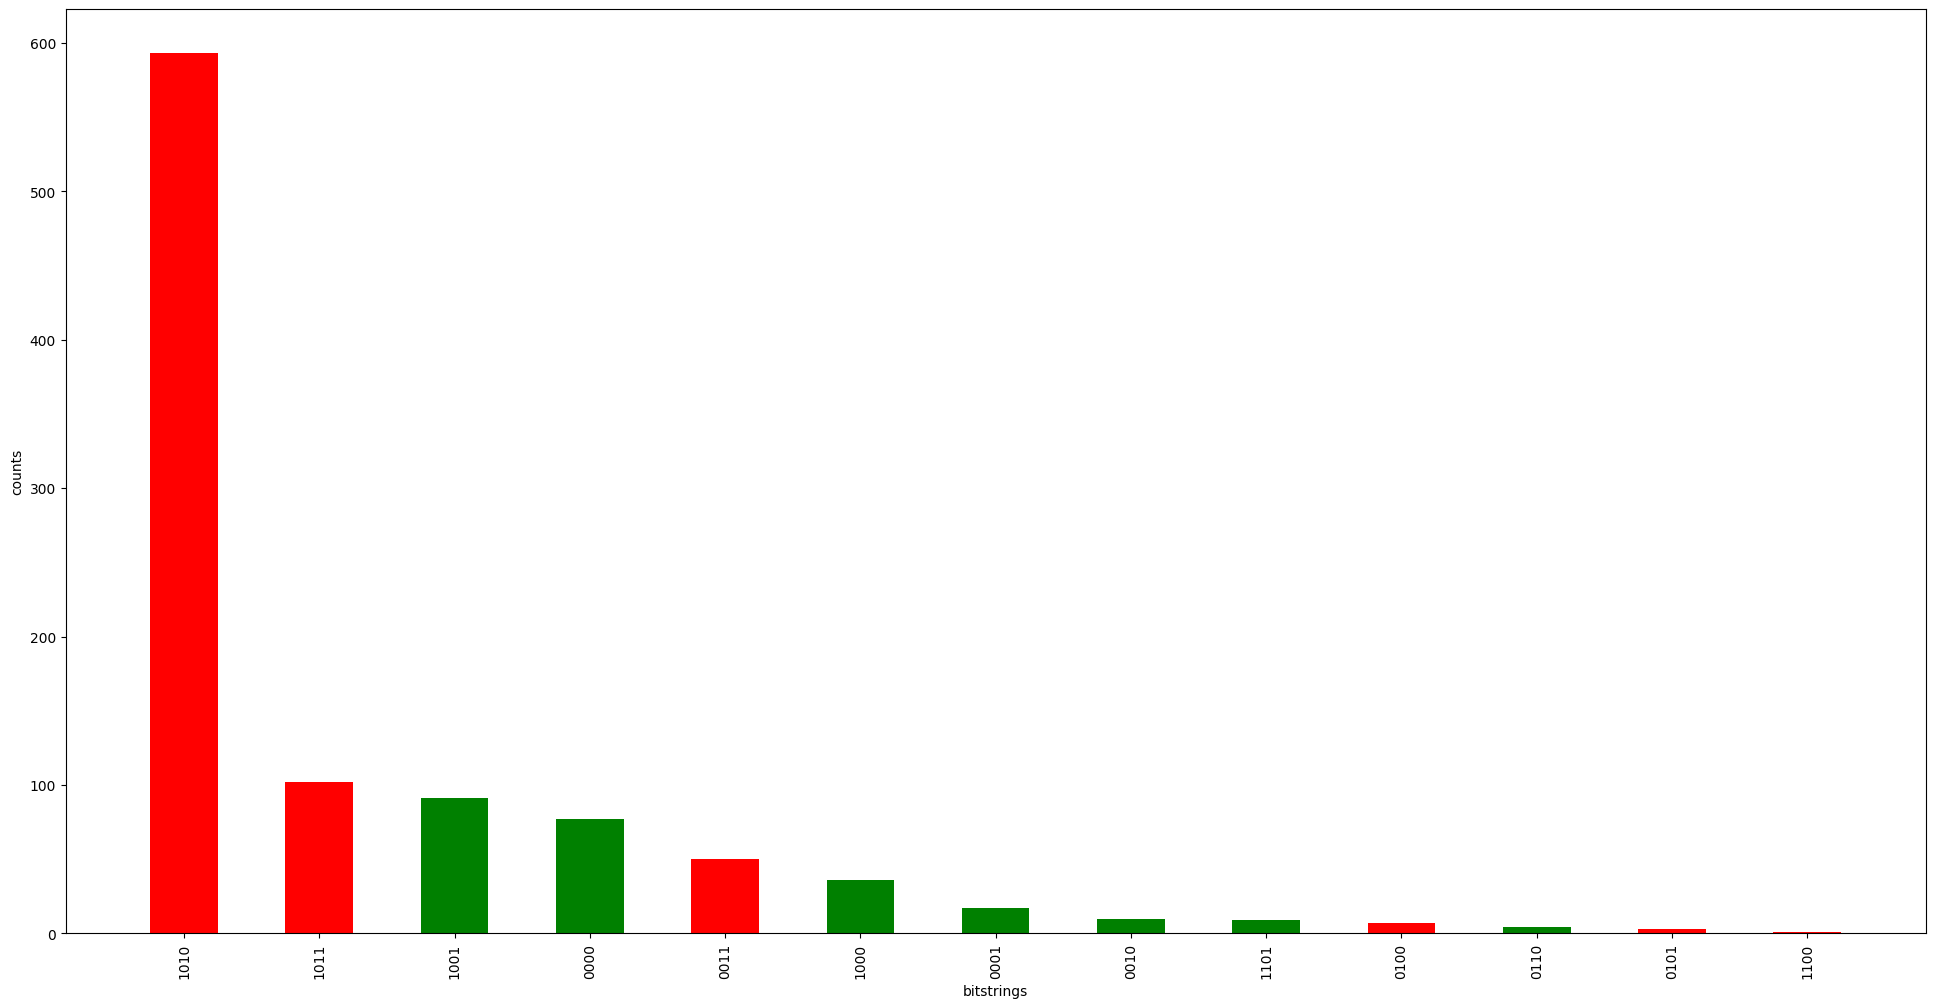

In [39]:
optimal_count_dict = quantum_loop(params[np.argmin(scores)])
plot_distribution(optimal_count_dict)

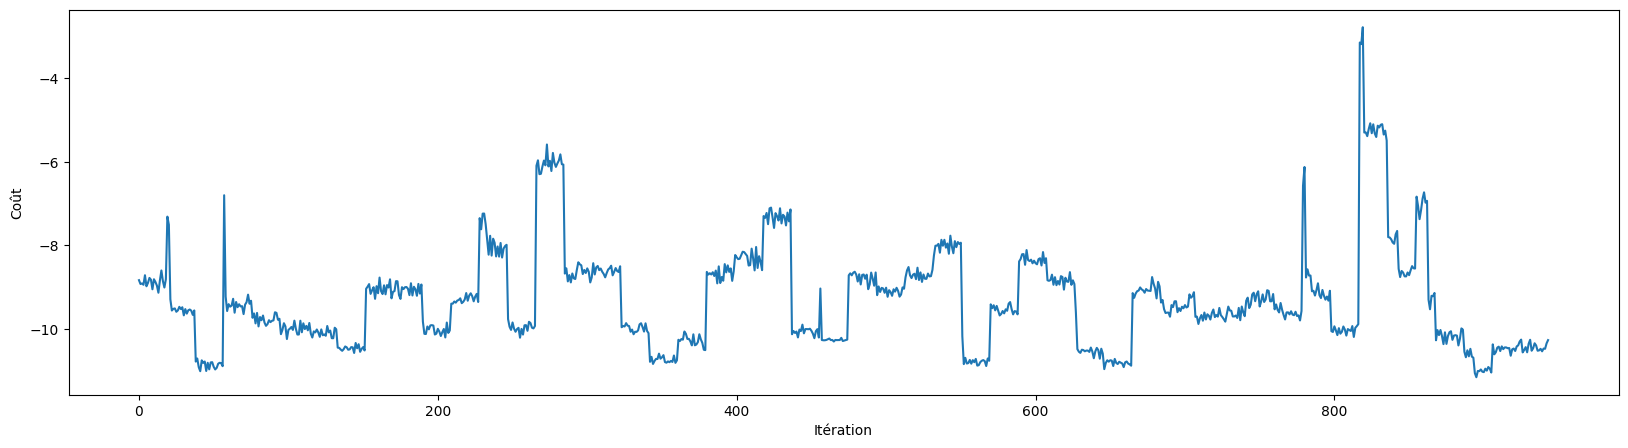

In [40]:
scores = []
params = []
objective_func_vals = []
for repetition in range(50):
    guess = {
        "t": np.random.uniform(1, 10, LAYERS),
        "s": np.random.uniform(1, 10, LAYERS),
    }

    try:
        res = minimize(
            func,
            args=Q,
            x0=np.r_[guess["t"], guess["s"]],
            method="Nelder-Mead", #SPSA
            tol=1e-8,
            options={"maxiter": 20},
            callback=callback_graph,
        )
        scores.append(res.fun)
        params.append(res.x)

        if res.fun <= -12:
            print("Stopping early as cost function value reached -12")
            break
        
    except Exception as e:
        pass

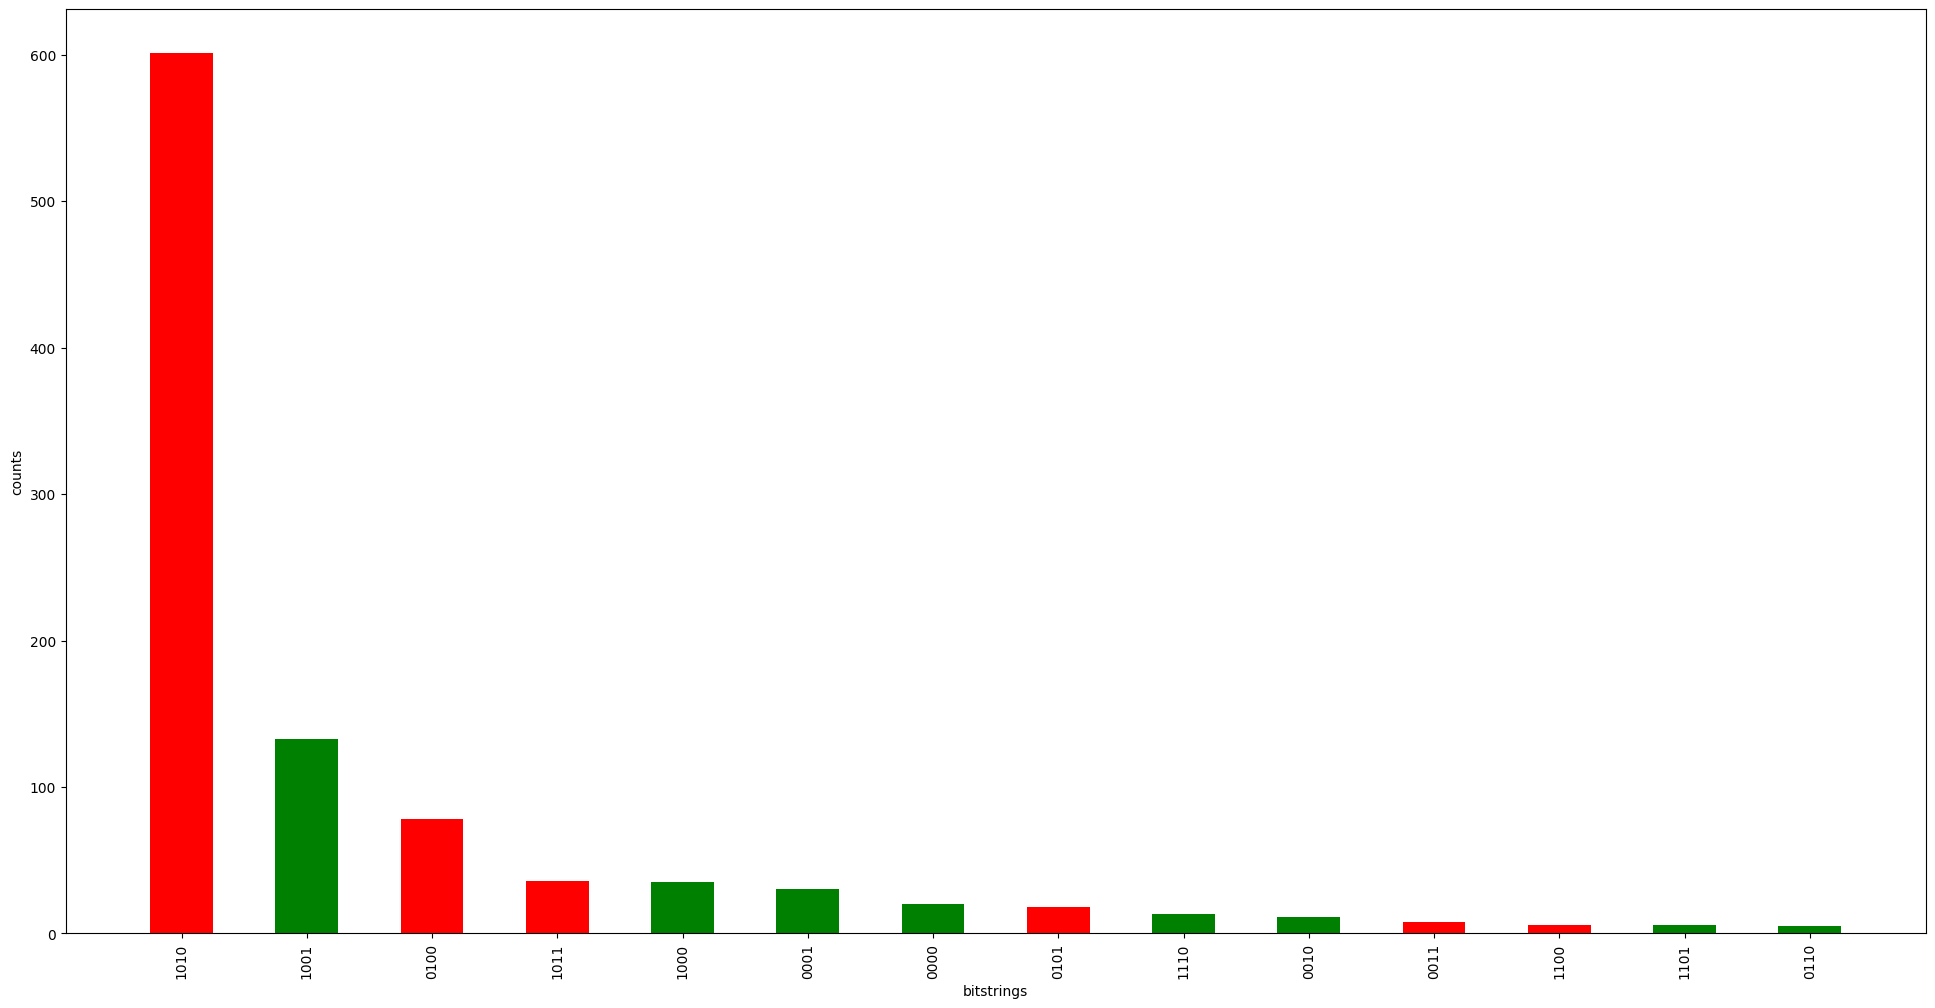

In [41]:
optimal_count_dict = quantum_loop(params[np.argmin(scores)])
plot_distribution(optimal_count_dict)

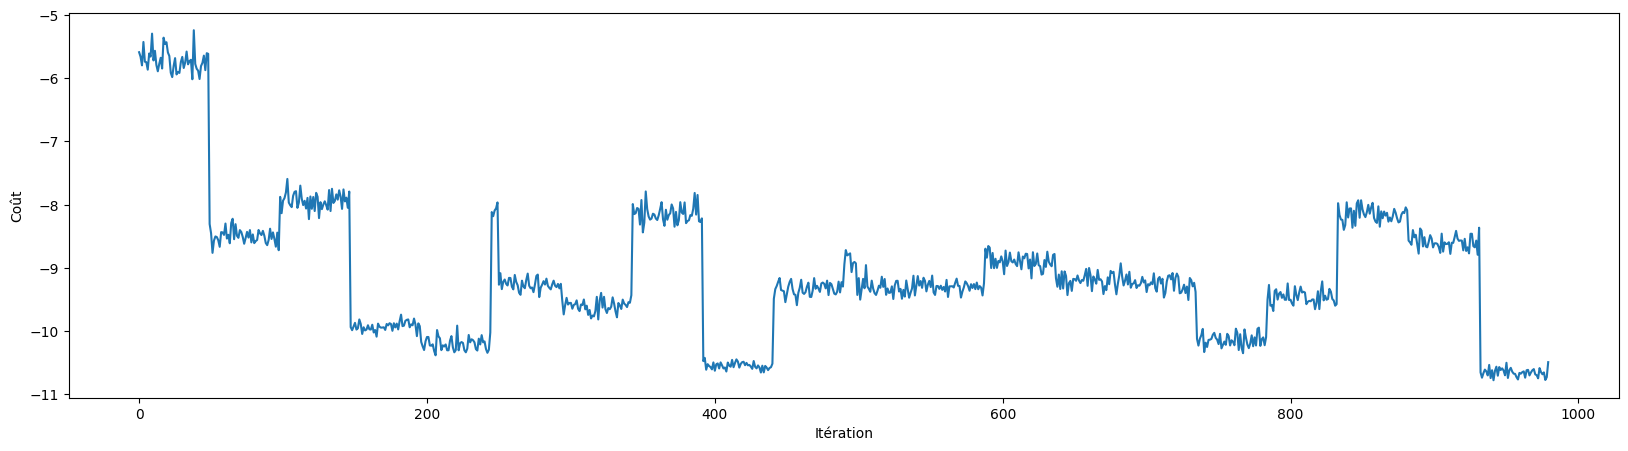

In [42]:
scores = []
params = []
objective_func_vals = []
for repetition in range(20):
    guess = {
        "t": np.random.uniform(1, 10, LAYERS),
        "s": np.random.uniform(1, 10, LAYERS),
    }

    try:
        res = minimize(
            func,
            args=Q,
            x0=np.r_[guess["t"], guess["s"]],
            method="Nelder-Mead", #SPSA
            tol=1e-8,
            options={"maxiter": 50},
            callback=callback_graph,
        )
        scores.append(res.fun)
        params.append(res.x)

        if res.fun <= -12:
            print("Stopping early as cost function value reached -12")
            break
        
    except Exception as e:
        pass

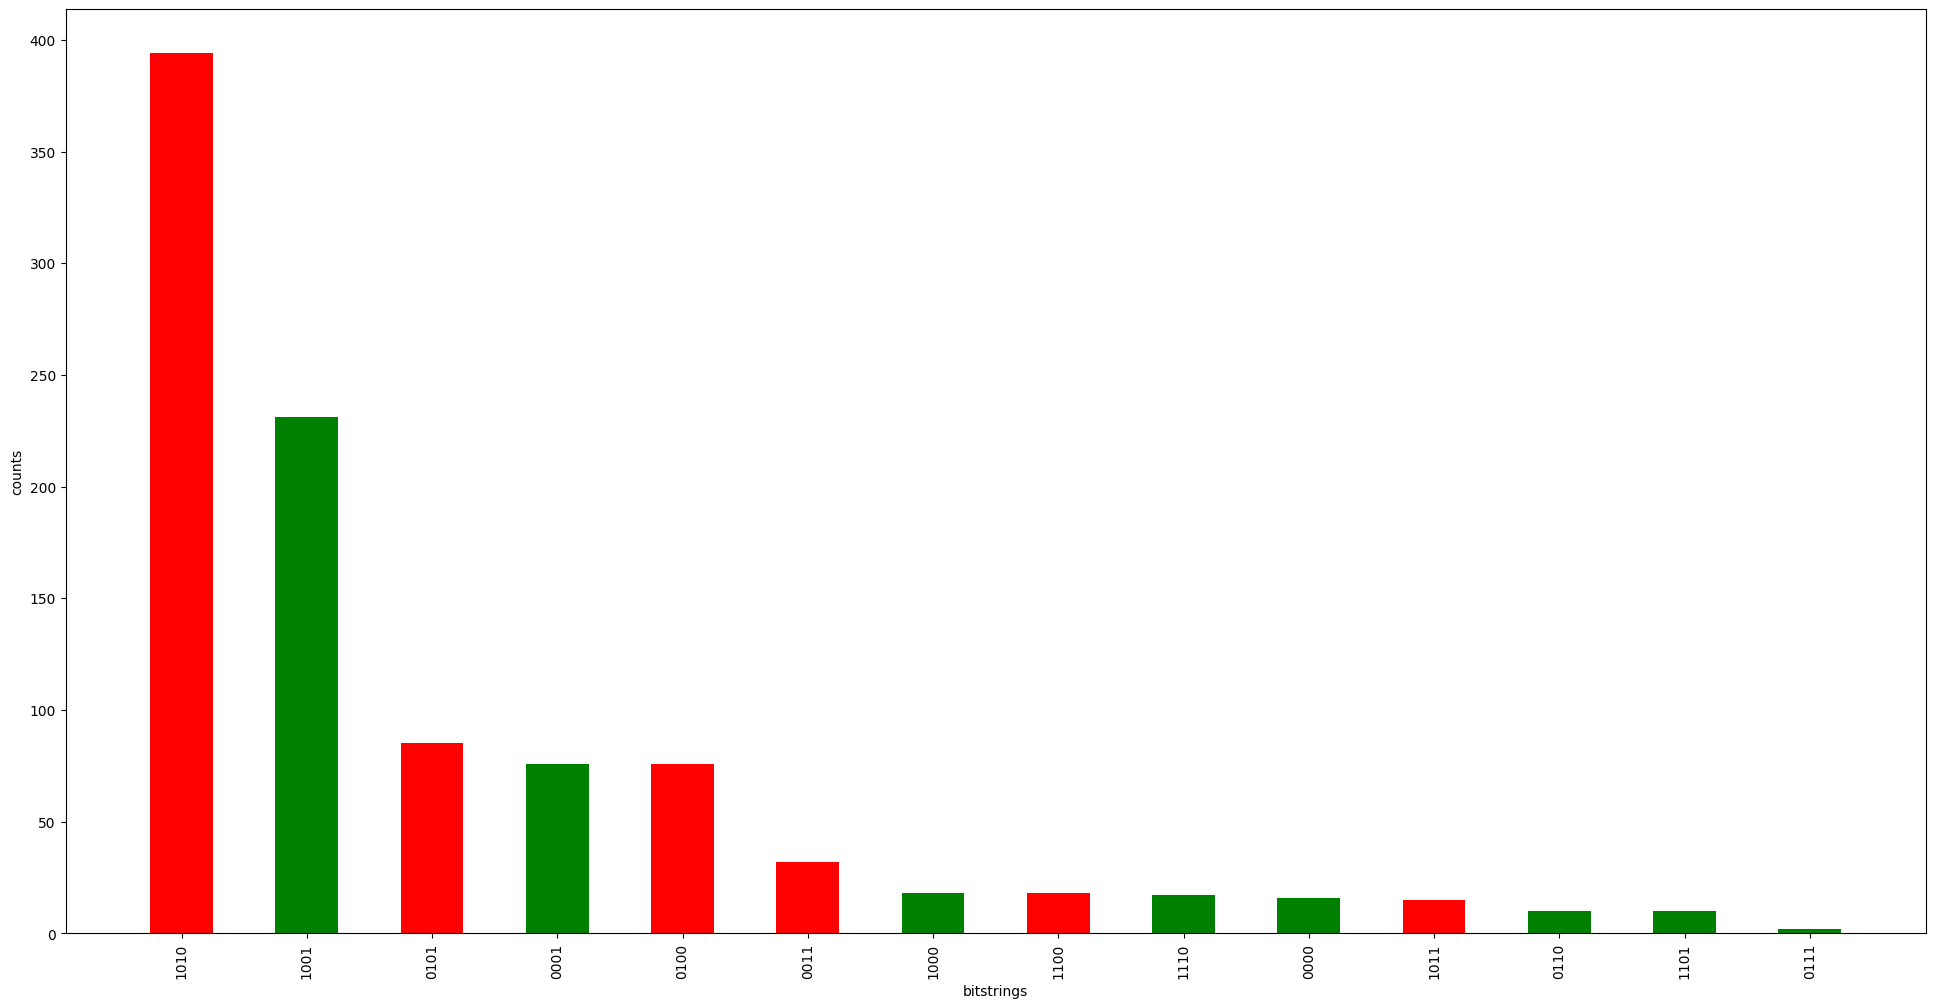

In [43]:
optimal_count_dict = quantum_loop(params[np.argmin(scores)])
plot_distribution(optimal_count_dict)